# Исследование и оптимизация системы контроля

In [1]:
from load_packages import load_packages

load_packages()

## Имитационная модель системы контроля

In [6]:
from packages.control_system.src.channel_manager import ChannelManager
from packages.control_system.src.time_bound import TimeBound

from packages.control_system.src.control_model import ControlModel
from control_system.control_model import analyze

def get_control_model(produce = (8, 18), control = (18, 28), count = 1) -> ControlModel:
    return ControlModel(ChannelManager(count), TimeBound(produce), TimeBound(control))

def arrange_stats(model, sample, ratio):
    return analyze(model, sample, ratio)

In [3]:
from packages.control_system.src.model_stats import ModelStats

def show_stats(model, sample: int, ratio: float):
    stats = arrange_stats(model, sample, ratio)
    
    print("Channels: \t{0}".format(stats.channels))
    
    print("Sample: \t{0}".format(sample))
    print("Missed: \t{0}".format(stats.missed))
    print("Ratio: \t{0}\n".format(stats.ratio))

In [4]:
for ratio in [0.8, 0.98]:
    show_stats(get_control_model(), 50, ratio)

Channels: 	13
Sample: 	50
Missed: 	10
Ratio: 	0.8

Channels: 	18
Sample: 	50
Missed: 	0
Ratio: 	1.0



In [14]:
import numpy as np
import matplotlib.pyplot as plt

def show_bar(keys, values, precision: int = 3):
    keys = list(map(lambda x: str(x), keys))
    values = list(map(lambda x: round(x, precision), values))
    
    bars = plt.bar(keys, values)
    
    plt.show()

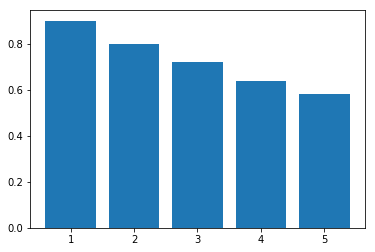

Channels: 	17
Sample: 	50
Missed: 	1
Ratio: 	0.98



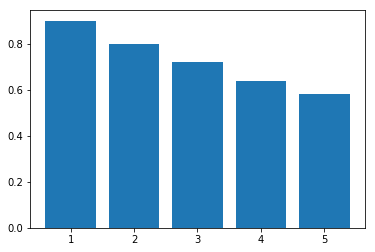

Channels: 	17
Sample: 	50
Missed: 	1
Ratio: 	0.98



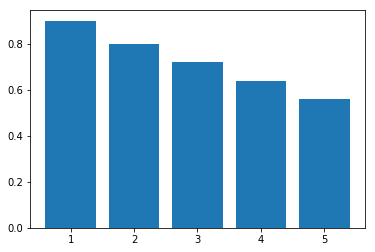

Channels: 	17
Sample: 	50
Missed: 	0
Ratio: 	1.0



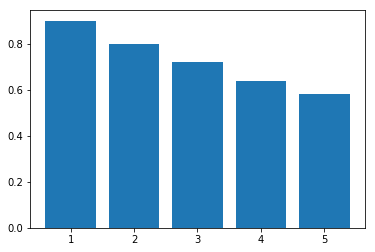

Channels: 	17
Sample: 	50
Missed: 	1
Ratio: 	0.98



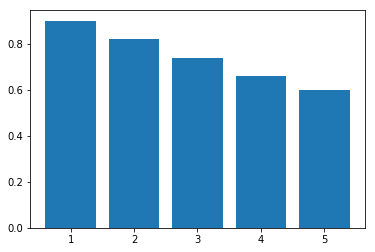

Channels: 	18
Sample: 	50
Missed: 	0
Ratio: 	1.0



In [29]:
def show_bars(bounds = (1, 5), sample: int = 50):
    
    keys = []
    values = []
    
    for channels in range(bounds[0], bounds[1] + 1):
        stats = get_control_model(count=channels).arrange_stats(sample)
        
        keys.append(channels)
        values.append(1 - stats.ratio)
        
    show_bar(keys, values)
    
    show_stats(get_control_model(), sample, 0.98)
    
for i in range(0,5):
    show_bars()

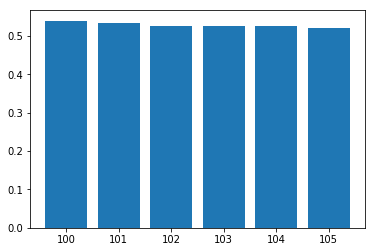

Channels: 	324
Sample: 	999
Missed: 	19
Ratio: 	0.980980980980981



In [31]:
show_bars(bounds=(100, 105), sample=999)